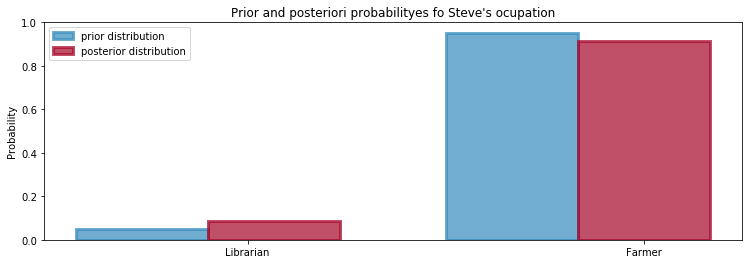

In [3]:
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
figsize(12.5, 4)

colors = ["#348ABD", "#A60628"]
figsize(12.5, 4)
prior = [1./21. , 20./21. ]
posterior = [0.087, 1-0.087]
plt.bar([0, 0.7], prior, alpha=0.7, width =0.25,
         color=colors[0], label="prior distribution",
         lw="3", edgecolor="#348ABD")
    
plt.bar([0 + 0.25, 0.7 + 0.25], posterior, alpha=0.7,
       width=0.25, color=colors[1],
       label="posterior distribution",
       lw="3", edgecolor="#A60628")

plt.xticks([0.20, 0.95], ["Librarian","Farmer"])
plt.ylabel("Probability")
plt.legend(loc="upper left")
plt.title("Prior and posteriori probabilityes fo Steve's ocupation")

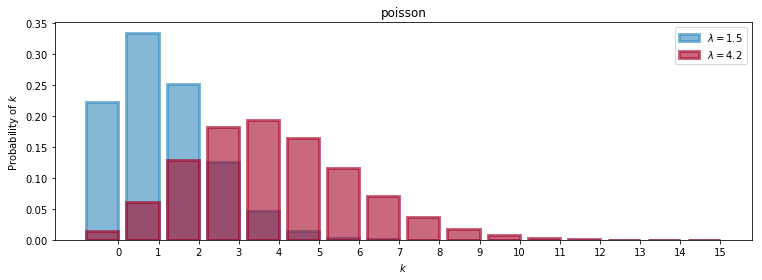

In [4]:
from IPython.core.pylabtools import figsize
import scipy.stats as stats
from matplotlib import pyplot as plt
figsize(12.5, 4)

poi = stats.poisson
lambda_ = [1.5, 4.25]
colors = ["#348ABD", "#A60628"]

a = np.arange(16)
plt.bar(a, poi.pmf(a, lambda_[0]), color=colors[0],
        label="$\lambda = %.1f$" % lambda_[0],
        alpha=0.60, edgecolor=colors[0], lw="3")

plt.bar(a, poi.pmf(a, lambda_[1]), color=colors[1],
        label="$\lambda = %.1f$" % lambda_[1],
        alpha=0.60, edgecolor=colors[1], lw="3")
        
plt.xticks( a + 0.4, a)
plt.legend()
plt.ylabel("Probability of $k$")
plt.xlabel("$k$")
plt.title("poisson")

[ 0.          0.04040404  0.08080808  0.12121212  0.16161616  0.2020202
  0.24242424  0.28282828  0.32323232  0.36363636  0.4040404   0.44444444
  0.48484848  0.52525253  0.56565657  0.60606061  0.64646465  0.68686869
  0.72727273  0.76767677  0.80808081  0.84848485  0.88888889  0.92929293
  0.96969697  1.01010101  1.05050505  1.09090909  1.13131313  1.17171717
  1.21212121  1.25252525  1.29292929  1.33333333  1.37373737  1.41414141
  1.45454545  1.49494949  1.53535354  1.57575758  1.61616162  1.65656566
  1.6969697   1.73737374  1.77777778  1.81818182  1.85858586  1.8989899
  1.93939394  1.97979798  2.02020202  2.06060606  2.1010101   2.14141414
  2.18181818  2.22222222  2.26262626  2.3030303   2.34343434  2.38383838
  2.42424242  2.46464646  2.50505051  2.54545455  2.58585859  2.62626263
  2.66666667  2.70707071  2.74747475  2.78787879  2.82828283  2.86868687
  2.90909091  2.94949495  2.98989899  3.03030303  3.07070707  3.11111111
  3.15151515  3.19191919  3.23232323  3.27272727  3.3

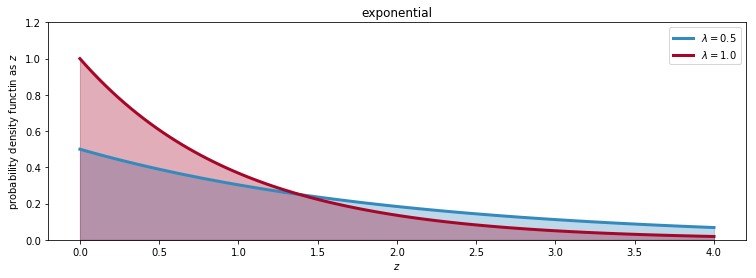

In [5]:
a = np.linspace(0, 4, 100)
expo = stats.expon
print(a)
print(expo.pdf(a, scale=1. / 0.5))
print(expo.pdf(a, scale=1. / 1))
lambda_ = [0.5, 1]
colors = ["#348ABD", "#A60628"]

for l,c in zip(lambda_, colors):
    plt.plot(a, expo.pdf(a, scale=1. / l),
            lw=3, color=c, label="$\lambda = %.1f$" % l)
    plt.fill_between(a, expo.pdf(a, scale=1. / l), color=c, alpha=.33)
    
plt.legend()
plt.ylabel("probability density functin as $z$")
plt.xlabel("$z$")
plt.ylim(0, 1.2)
plt.title("exponential")
    

(0, 74)

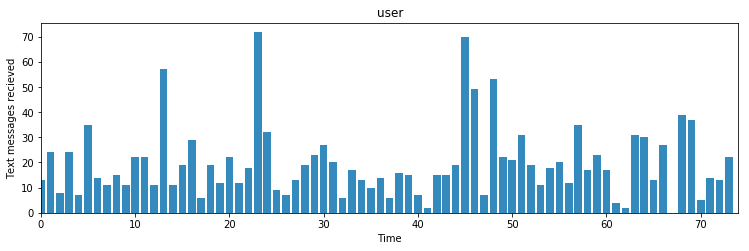

In [6]:
from os import makedirs
makedirs("data", exist_ok=True)

from urllib.request import urlretrieve
urlretrieve("https://git.io/vXTVC","data/txtdata.csv")

figsize(12.5, 3.5)

count_data = np.loadtxt("data/txtdata.csv")
n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color="#348ABD")

plt.xlabel("Time")
plt.ylabel("Text messages recieved")
plt.title("user")
plt.xlim(0, n_count_data)


In [7]:
import pymc as pm

alpha = 1.0 / count_data.mean()
lambda_1 = pm.Exponential("lambda_1", alpha)
lambda_2 = pm.Exponential("lambda_2", alpha)

tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data)
print("Random output:", tau.random(), tau.random(), tau.random())

Random output: 20 20 30


In [8]:
@pm.deterministic
def lambda_(tau=tau, lambda_1=lambda_1, lambda2_=lambda_2):
    out = np.zeros(n_count_data)
    out[:tau] = lambda_1
    out[tau:] = lambda_2
    return out

In [9]:
observation = pm.Poisson("obs", lambda_, value=count_data, observed=True)
model = pm.Model([observation, lambda_1, lambda_2, tau])

In [10]:
mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000)

 [-----------------100%-----------------] 40000 of 40000 complete in 7.4 sec

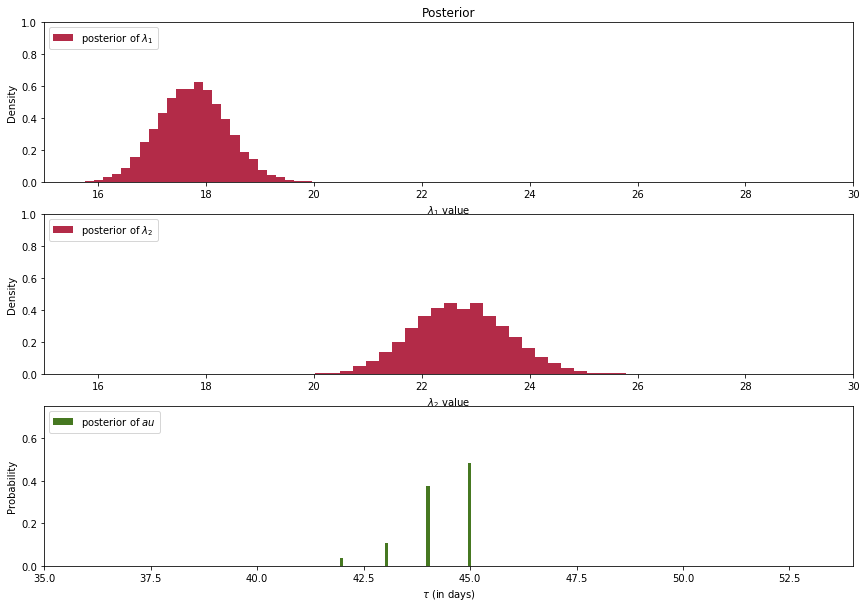

In [11]:
lambda_1_samples = mcmc.trace('lambda_1')[:]
lambda_2_samples = mcmc.trace('lambda_2')[:]
tau_samples = mcmc.trace('tau')[:]

figsize(14.5, 10)

ax = plt.subplot(311)
ax.set_autoscaley_on(False)
plt.hist(lambda_1_samples, histtype='stepfilled',bins=30, alpha=0.85, 
         color="#A60628", normed=True, label="posterior of $\lambda_1$")
plt.legend(loc="upper left")
plt.title("Posterior")
plt.xlim([15, 30])
plt.xlabel("$\lambda_1$ value")
plt.ylabel("Density")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled',bins=30, alpha=0.85, 
         color="#A60628", normed=True, label="posterior of $\lambda_2$")
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel("$\lambda_2$ value")
plt.ylabel("Density")

ax = plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1.0, 
         color="#467821", weights=w, rwidth=2.0, label="posterior of $\tau$")
plt.legend(loc="upper left")
plt.ylim([0, 0.75])
plt.xlim([35, len(count_data) - 20])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("Probability")

74


/Users/hiroki/.pyenv/versions/anaconda3-4.0.0/envs/py3_personal/lib/python3.5/site-packages/ipykernel/__main__.py:11: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.


[ 17.750941    17.750941    17.750941    17.750941    17.750941    17.750941
  17.750941    17.750941    17.750941    17.750941    17.750941    17.750941
  17.750941    17.750941    17.750941    17.750941    17.750941    17.750941
  17.750941    17.750941    17.750941    17.750941    17.750941    17.750941
  17.750941    17.750941    17.750941    17.750941    17.750941    17.750941
  17.750941    17.750941    17.750941    17.750941    17.750941    17.750941
  17.750941    17.750941    17.750941    17.750941    17.75110099
  17.75501994  17.91500439  18.41527082  20.27121049  22.71359381
  22.71380381  22.71380381  22.71380381  22.71380381  22.71380381
  22.71380381  22.71380381  22.71380381  22.71380381  22.71380381
  22.71380381  22.71380381  22.71380381  22.71380381  22.71380381
  22.71380381  22.71380381  22.71380381  22.71380381  22.71380381
  22.71380381  22.71380381  22.71380381  22.71380381  22.71380381
  22.71380381  22.71380381  22.71380381]


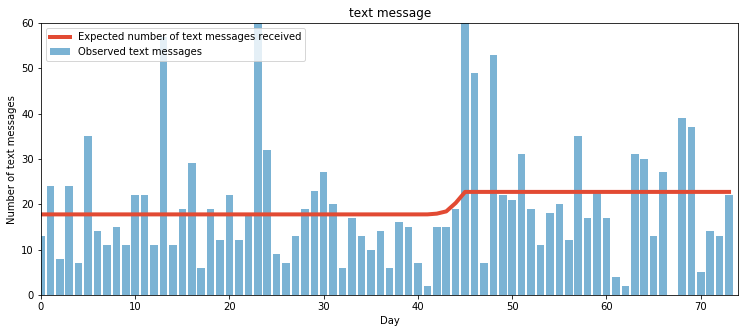

In [17]:
figsize(12.5, 5)
N = tau_samples.shape[0]
n_count_data = len(count_data)
print(n_count_data)
expected_texts_per_day = np.zeros(n_count_data)

for day in range(0, n_count_data):
    ix = day < tau_samples
    
    expected_texts_per_day[day] = \
     (lambda_1_samples[ix].sum()
       + lambda_2_samples[-ix].sum()) / N
        
plt.plot(range(n_count_data), expected_texts_per_day,
         lw = 4, color="#E24A33",
         label="Expected number of text messages received")

plt.xlim(0, n_count_data)
plt.ylim(0, 60)
plt.xlabel("Day")
plt.ylabel("Number of text messages")
plt.title("text message")
plt.bar(np.arange(len(count_data)), count_data,
        color="#348ABD", alpha = 0.65,
        label="Observed text messages")

plt.legend(loc="upper left")

print(expected_texts_per_day)